# Alcohol Metabolism in Men and Women - An observational Study
Women exhibit a lower tolerance for alcohol and develop alcohol-related liver disease more readily than men.  When men and women of the same size and drinking history consume equal amounts of alcohol, the women on average carry a higher concentration of alcohol in their bloodstream.  According to a team of Italian researchers, this occurs because alcohol-degrading enzymes in the stomach (where alcohol is partially metabolized before it enters the bloodstream and is eventually metabolized by the liver) are more active in men that in women.  The researchers studies the extent to which the activity of the enzyme explained the first-pass alcohol metabolism and the extent to which ist explained the first-pass metabolism between women and men.  (Data from M. Frezza et al., "High Blood Alcohol Levels in Women," *New England Journal of Medicine* 322 (1990): 95-99.)

The subjects were 18 men and 14 women, all living in Trieste.  Three of the women and five of the men were categorized as alcoholic.  All subjects received ethanol, at a dose of 0.3 grams per kilogram of body weight, orally one day and intravenously another, in randomly determined order.  Since the intravenous administration bypasses the stomach, the difference in blood alcohol concentration - the concentration after intravenous administration minus the concentration after oral administration - provides a measure of "first-pass metabolism" in the stomach.  In addition, gastric alcohol dehydrogenase (AD) activity (activity of the key enzyme) was measured in mucus samples taken from the stomach linings.

Several questions arise.  Do levels of first-pass metabolism differ between men and women?  Can the differences be explained by postulating that men have more dehydrogenase activity in their stomachs?  Are the answers to these questions complicated by an alcoholism effect?

In [17]:
# standard library imports

# 3rd party library imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

plt.rcParams['text.usetex'] = True
pd.options.display.float_format = "{:.2f}".format
sns.set()

We begin by reading the data and summarizing the variables.

In [18]:
df = pd.read_csv('case1101.csv')
df.head()

,Subject,Metabol,Gastric,Sex,Alcohol
0,1,0.60,1.00,Female,Alcoholic
1,2,0.60,1.60,Female,Alcoholic
2,3,1.50,1.50,Female,Alcoholic
3,4,0.40,2.20,Female,Non-alcoholic
4,5,0.10,1.10,Female,Non-alcoholic


In [19]:
df.groupby(['Sex', 'Alcohol'])['Metabol'].std()   

Sex     Alcohol      
Female  Alcoholic       0.52
        Non-alcoholic   0.88
Male    Alcoholic       0.88
        Non-alcoholic   3.77
Name: Metabol, dtype: float64

There is weak evidence for the hypothesis of equal variance.

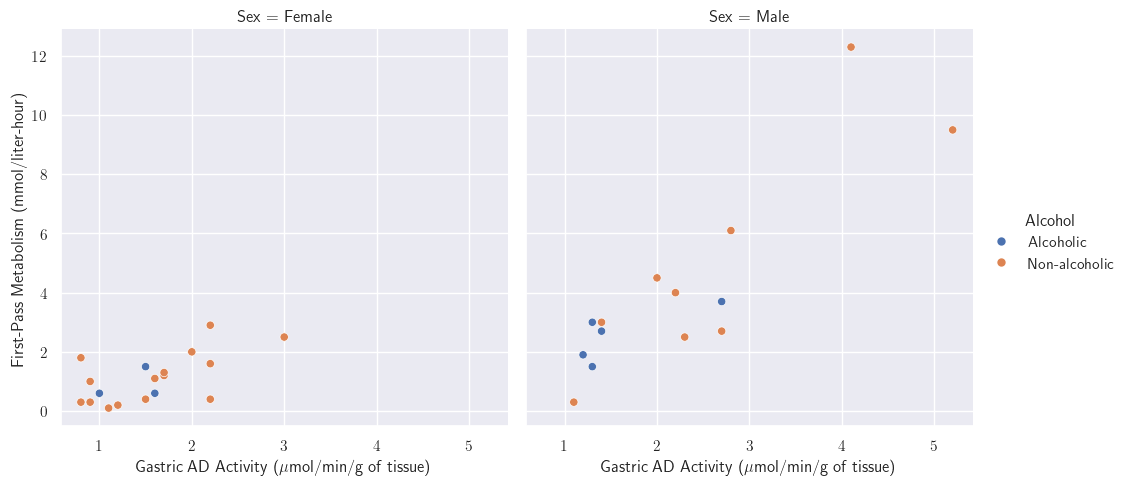

In [20]:
g = sns.relplot(data=df, x='Gastric', y='Metabol', col='Sex', hue='Alcohol', kind='scatter')
_ = g.set_xlabels(r'Gastric AD Activity ($\mu$mol/min/g of tissue)')
_ = g.set_ylabels(r'First-Pass Metabolism (mmol/liter-hour)')

In [45]:
formula = (
    'Metabol '
    '~ Gastric '
    '+ C(Sex, Treatment(reference="Male")) '
    '+ C(Alcohol, Treatment(reference="Non-alcoholic"))'
    '+ Gastric:C(Sex, Treatment(reference="Male")) '
    '+ C(Alcohol, Treatment(reference="Non-alcoholic")):C(Sex, Treatment(reference="Male")) '
    '+ Gastric:C(Alcohol, Treatment(reference="Non-alcoholic")) '
    '+ Gastric:C(Alcohol, Treatment(reference="Non-alcoholic")):C(Sex, Treatment(reference="Male"))'
)
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Metabol   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     16.47
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           9.35e-08
Time:                        14:19:49   Log-Likelihood:                -48.052
No. Observations:                  32   AIC:                             112.1
Df Residuals:                      24   BIC:                             123.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================================================================
                                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                              -1.6597      1.000     -1.660      0.110      -3.723       0.404
C(Sex, Treatment(reference="Male"))[T.Female]                                                                           1.4657      1.333      1.100      0.282      -1.285       4.216
C(Alcohol, Treatment(reference="Non-alcoholic"))[T.Alcoholic]                                                           2.5521      1.946      1.311      0.202      -1.464       6.568
C(Alcohol, Treatment(reference="Non-alcoholic"))[T.Alcoholic]:C(Sex, Treatment(reference="Male"))[T.Female]            -2.2517      4.394     -0.512      0.613     -11.320       6.816
Gastric                                                                                                                 2.5142      0.343      7.322      0.000       1.805       3.223
Gastric:C(Sex, Treatment(reference="Male"))[T.Female]                                                                  -1.6734      0.620     -2.698      0.013      -2.953      -0.393
Gastric:C(Alcohol, Treatment(reference="Non-alcoholic"))[T.Alcoholic]                                                  -1.4587      1.053     -1.386      0.179      -3.632       0.714
Gastric:C(Alcohol, Treatment(reference="Non-alcoholic"))[T.Alcoholic]:C(Sex, Treatment(reference="Male"))[T.Female]     1.1987      2.998      0.400      0.693      -4.989       7.386
==============================================================================
Omnibus:                        9.228   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.936
Skew:                           0.672   Prob(JB):                      0.00422
Kurtosis:                       5.529   Cond. No.                         61.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

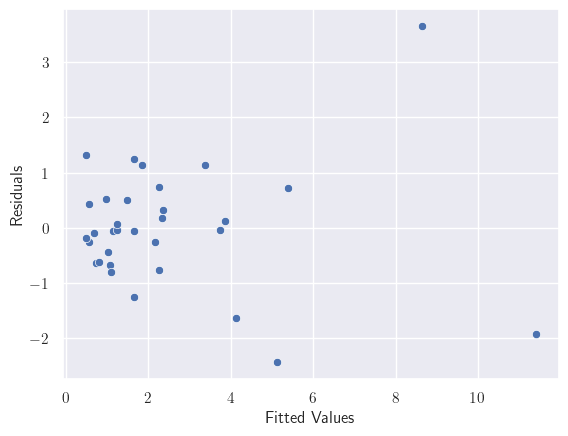

In [46]:
ax = sns.scatterplot(x=results.fittedvalues, y=results.resid)
ax.set_xlabel('Fitted Values')
_ = ax.set_ylabel('Residuals')

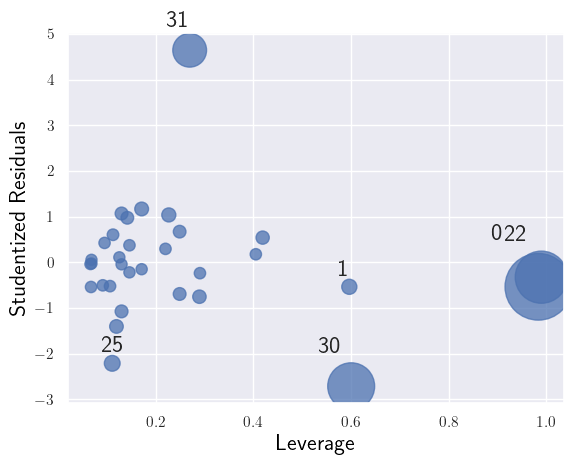

In [47]:
fig, ax = plt.subplots()
_ = sm.graphics.influence_plot(results, ax=ax)
_ = ax.set_title('')

In [48]:
df[results.fittedvalues > 6]

,Subject,Metabol,Gastric,Sex,Alcohol
30,31,9.50,5.20,Male,Non-alcoholic
31,32,12.30,4.10,Male,Non-alcoholic


There are two points, 30 and 31, that may have undo influence.

In [50]:
results1 = smf.ols(formula=formula, data=df).fit()
results2 = smf.ols(formula=formula, data=df.query('Subject < 31')).fit()
df1 = pd.DataFrame({'estimate': results1.params, 'SE': results1.bse, 'p': results1.pvalues})
df2 = pd.DataFrame({'estimate': results2.params, 'SE': results2.bse, 'p': results2.pvalues})

cidx1 = pd.MultiIndex.from_product([('All 32',), df1.columns])
cidx2 = pd.MultiIndex.from_product([('Cases 31 and 32 removed',), df2.columns])
df1.columns = cidx1
df2.columns = cidx2
df1.join(df2)

All 32            \
                                                   estimate   SE    p   
Intercept                                             -1.66 1.00 0.11   
C(Sex, Treatment(reference="Male"))[T.Female]          1.47 1.33 0.28   
C(Alcohol, Treatment(reference="Non-alcoholic")...     2.55 1.95 0.20   
C(Alcohol, Treatment(reference="Non-alcoholic")...    -2.25 4.39 0.61   
Gastric                                                2.51 0.34 0.00   
Gastric:C(Sex, Treatment(reference="Male"))[T.F...    -1.67 0.62 0.01   
Gastric:C(Alcohol, Treatment(reference="Non-alc...    -1.46 1.05 0.18   
Gastric:C(Alcohol, Treatment(reference="Non-alc...     1.20 3.00 0.69   

                                                   Cases 31 and 32 removed  \
                                                                  estimate   
Intercept                                                            -0.68   
C(Sex, Treatment(reference="Male"))[T.Female]                         0.49   
C(Alcohol, Treatment(reference="Non-alcoholic")...                    1.57   
C(Alcohol, Treatment(reference="Non-alcoholic")...                   -1.27   
Gastric                                                               1.92   
Gastric:C(Sex, Treatment(reference="Male"))[T.F...                   -1.08   
Gastric:C(Alcohol, Treatment(reference="Non-alc...                   -0.87   
Gastric:C(Alcohol, Treatment(reference="Non-alc...                    0.61   

                                                              
                                                     SE    p  
Intercept                                          1.31 0.61  
C(Sex, Treatment(reference="Male"))[T.Female]      1.47 0.74  
C(Alcohol, Treatment(reference="Non-alcoholic")... 1.81 0.39  
C(Alcohol, Treatment(reference="Non-alcoholic")... 3.47 0.72  
Gastric                                            0.61 0.00  
Gastric:C(Sex, Treatment(reference="Male"))[T.F... 0.72 0.15  
Gastric:C(Alcohol, Treatment(reference="Non-alc... 0.96 0.38  
Gastric:C(Alcohol, Treatment(reference="Non-alc... 2.32 0.80

Text(0, 0.5, "Cook's\nDistance")

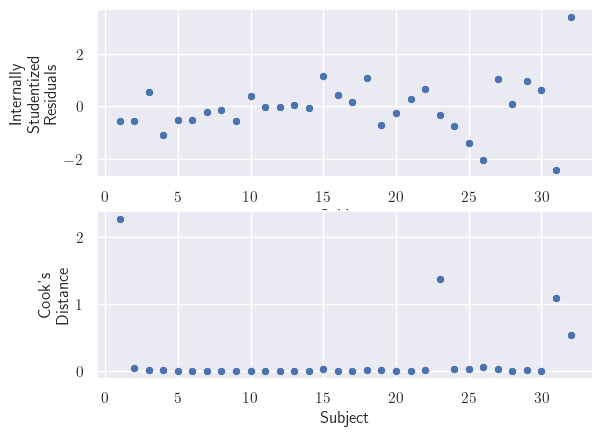

In [29]:
infl = results.get_influence()
infldf = infl.summary_frame()
fig, axes = plt.subplots(nrows=2, ncols=1)
sns.scatterplot(x=df.Subject, y=infldf['standard_resid'], ax=axes[0])
axes[0].set_ylabel('Internally\nStudentized\nResiduals')
sns.scatterplot(x=df.Subject, y=infldf['cooks_d'], ax=axes[1])
axes[1].set_ylabel("Cook's\nDistance")
                                 

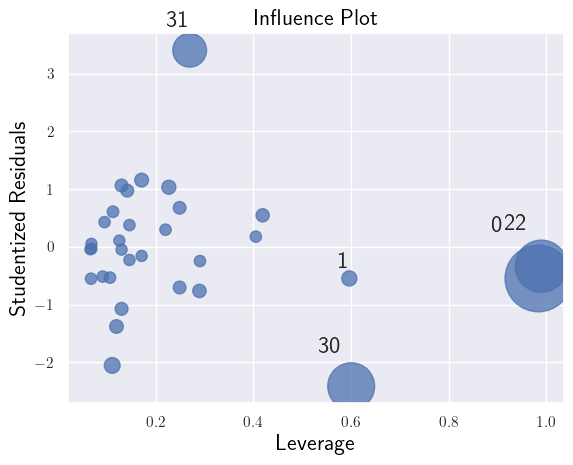

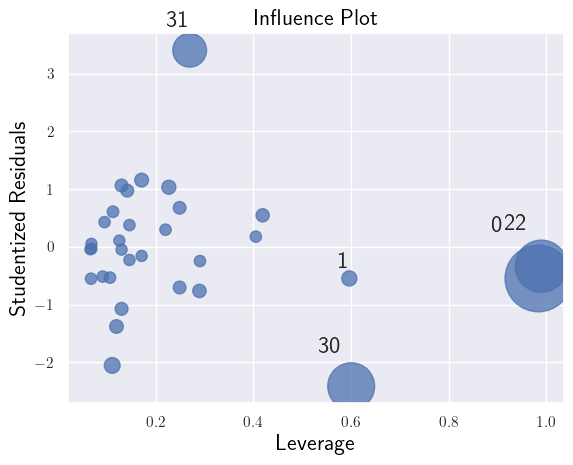

In [30]:
infl.plot_influence()

This suggests that Subjects 31 and 32 might be disregarded.

In [ ]:
df = df.loc[df.Subject < 31, :]
df.describe()

This suggests that Subjects 31 and 32 might be disregarded.

Now we go back to refining the model.  First of all, it is not clear that alcohol is a factor at all.  We can do an extra sums of squares $F$-test for that.

In [ ]:
formula = (
    'Metabol ~ Gastric + Sex + Alcohol '
    '+ Gastric:Sex + Sex:Alcohol + Gastric:Alcohol '
    '+ Gastric:Sex:Alcohol'
)
model = smf.ols(formula, data=df)
model_fit = model.fit()
model_fit.summary()

formula_reduced = 'Metabol ~ Gastric + Sex + Gastric:Sex'
model_reduced = smf.ols(formula_reduced, data=df)
model_rfit = model_reduced.fit()
model_rfit.summary()

In [ ]:
f_stat = ((model_rfit.ssr - model_fit.ssr) / (model_rfit.df_resid - model_fit.df_resid)) / model_fit.mse_resid    
f_stat

In [ ]:
fpvalue = scipy.stats.f.sf(4, 24, f_stat)
fpvalue

This strongly suggests that all of the coefficients for an alcohol effect are zero and can be dropped from the model.  We can additionally check as to whether we can drop sex from the model.

In [ ]:
formula_reduced2 = 'Metabol ~ Gastric'
model_rfit2 = smf.ols(formula_reduced2, data=df).fit()
model_rfit2.summary()

In [ ]:
f_stat = ((model_rfit2.ssr - model_rfit.ssr) / (model_rfit2.df_resid - model_rfit.df_resid)) / model_rfit.mse_resid    
f_stat

In [ ]:
scipy.stats.f.sf(model_rfit2.df_resid - model_rfit.df_resid, model_rfit.df_resid, f_stat)  

This $p$-value is too high.  We cannot conclude that we can drop both the sex and the sex-gastric interaction term from the model.  How about just the sex term?

In [ ]:
formula_reduced3 = 'Metabol ~ Gastric + Sex:Gastric'
model_rfit3 = smf.ols(formula_reduced3, data=df).fit()
model_rfit3.summary()

In [ ]:
f_stat = ((model_rfit3.ssr - model_rfit.ssr) / (model_rfit3.df_resid - model_rfit.df_resid)) / model_rfit.mse_resid    
scipy.stats.f.sf(model_rfit3.df_resid - model_rfit.df_resid, model_rfit.df_resid, f_stat)  

That provides strong evidence that the sex term can be dropped.  And finally, it makes sense to drop the intercept as well, since there is no first-pass metabolism if there is no activity of the enzyme.

In [ ]:
formula_reduced4 = 'Metabol ~ Gastric + Sex:Gastric - 1'
model_rfit4 = smf.ols(formula_reduced4, data=df).fit()
model_rfit4.summary()

In [ ]:
f_stat = ((model_rfit4.ssr - model_rfit3.ssr) / (model_rfit4.df_resid - model_rfit3.df_resid)) / model_rfit3.mse_resid    
scipy.stats.f.sf(model_rfit4.df_resid - model_rfit3.df_resid, model_rfit3.df_resid, f_stat) 

Again, the $F$-test shows that this is justified, so here we have our final model.  

$\mu\{metabolism|gast,sex\} = \beta_1 gast + \beta_2 gast \times sex$

Note that for any level of gastric AD activity, the mean first pass metabolism for men exceeds that of women by the ratio of $\frac{\beta_1 + \beta_2}{\beta_1} = 2.203$.

# Statistical Conclusion
The following inferences pertain only to individuals with gastric AD activity levels between 0.8 and 3.0 $\mu$mol/min/g.  No reliable model could be determined for values greater than 3.0  There was no evidence from the data that alcoholism was related to first-pass metabolism in any way ($p$-value = 0.93, from an F-test for significance of alcoholism and its interaction with gastric activity and sex.)  Convincing evidence exists that first-pass metabolism was larger for males than for females overall (two-sided $p$-value = 0.0002, from a rank-sum test) and that gastric AD activity was larger for males than for females (two-sided $p$-value = 0.07 from a rank-sum test).  Males had higher first-pass metabolism than females even accounting for differences in gastric AD activity (two-sided $p$-value = 0.0003 from a $t$-test for equality of male and female slopes when both intercepts are zero).  For a given level of gastric dehydrogenase activity, the mean first-pass alcohol metabolism for men is estimated to be 2.20 times as large as the first-pass alcohol metabolism for women (approximate 95% confidence interval from 1.37 to 3.04).